In [3]:
# import libraries for data manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
# import penguine dataset
penguins = pd.read_csv('penguins.csv')

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
# drop na values from the dataset
penguins.info()

# Sex column seems to have the most missing values
penguins_clean = penguins.dropna(subset='sex')
penguins_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  

In [6]:
# check for duplicates in the dataset
pen_dups = penguins_clean.duplicated(subset='sex').sum()
pen_dups

# check for unique variable names in specific columns
print(penguins_clean['species'].unique())
print(penguins_clean['island'].unique())
print(penguins_clean['sex'].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE']


In [7]:

pen_size = penguins_clean['species'].nunique()

In [8]:
print(f'there are {pen_size} unique species')

there are 3 unique species


In [9]:
print(penguins_clean.shape)

(333, 7)


#### Ordinary Linear Regression model 

<Figure size 1000x600 with 0 Axes>

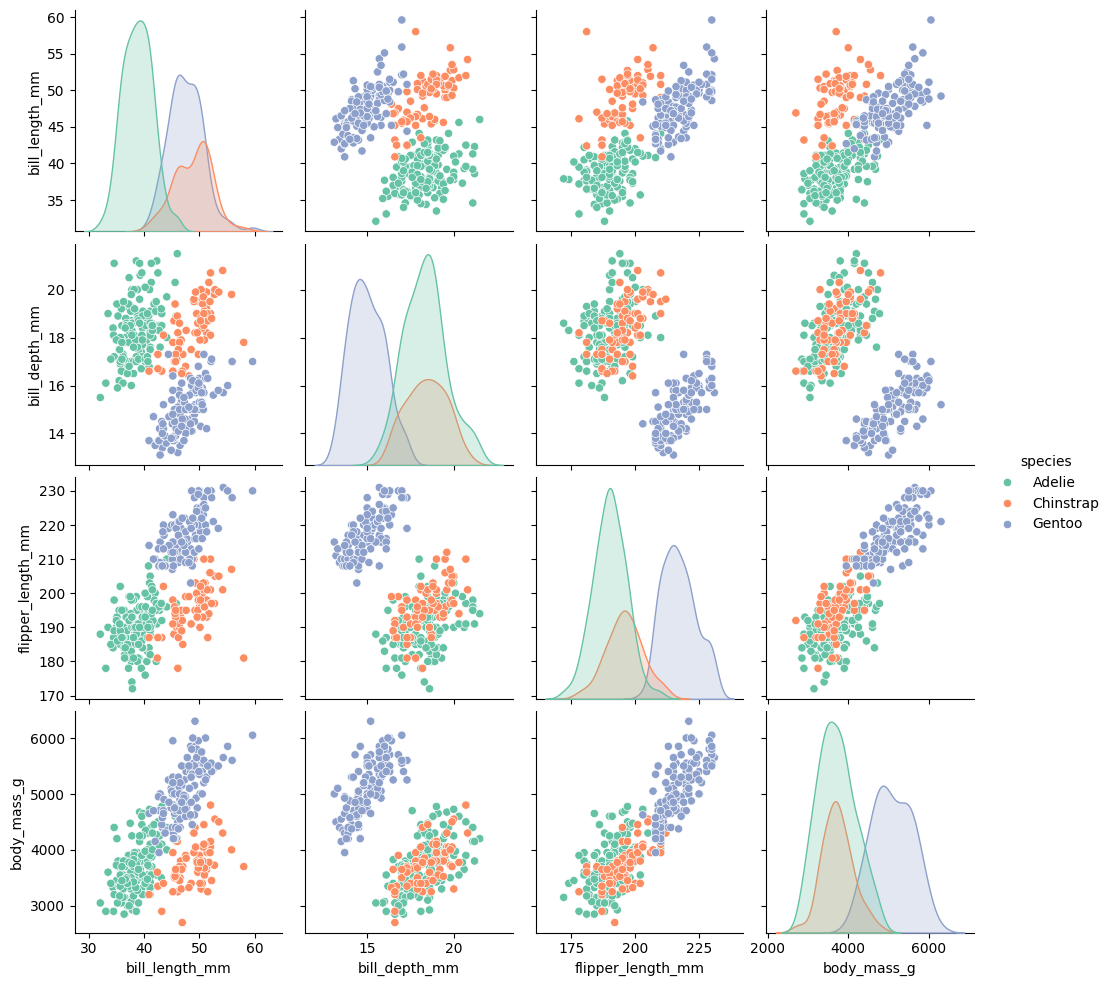

In [10]:
# visulize the dataset
plt.figure(figsize=(10, 6))
sns.pairplot(penguins_clean, hue='species', palette='Set2')
plt.show()

In [11]:
penguins_clean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


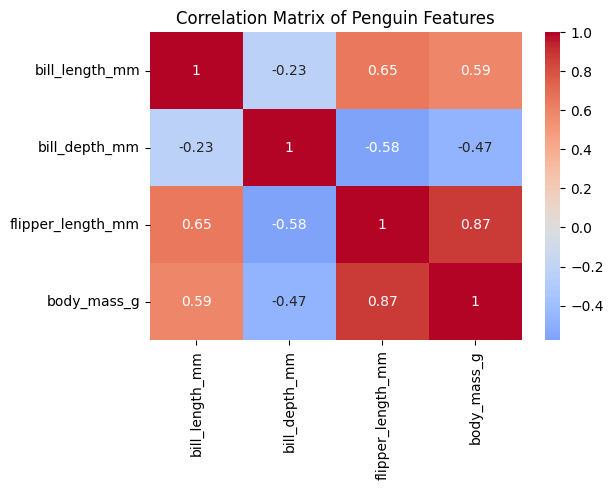

In [12]:
# create a correlation matrix
corr = penguins_clean.iloc[:,2:6].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Penguin Features')
plt.show()

<Figure size 600x400 with 0 Axes>

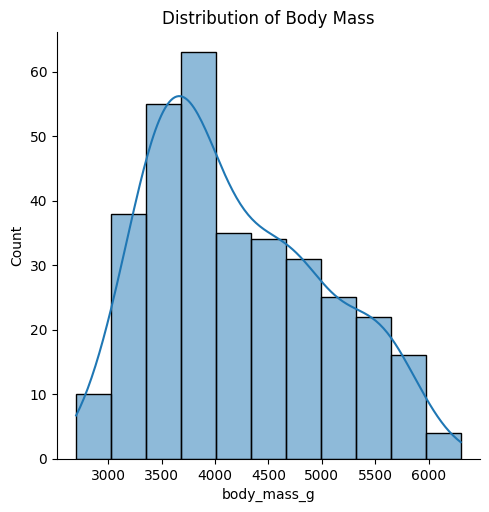

In [13]:
# test normal distribution of the dataset
# check for normality of the dataset

plt.figure(figsize=(6, 4))
sns.displot(penguins_clean['body_mass_g'], kde=True)
plt.title('Distribution of Body Mass')  
plt.show()

In [14]:
pen_num = penguins_clean.iloc[:, 2:6]
pen_num.head()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


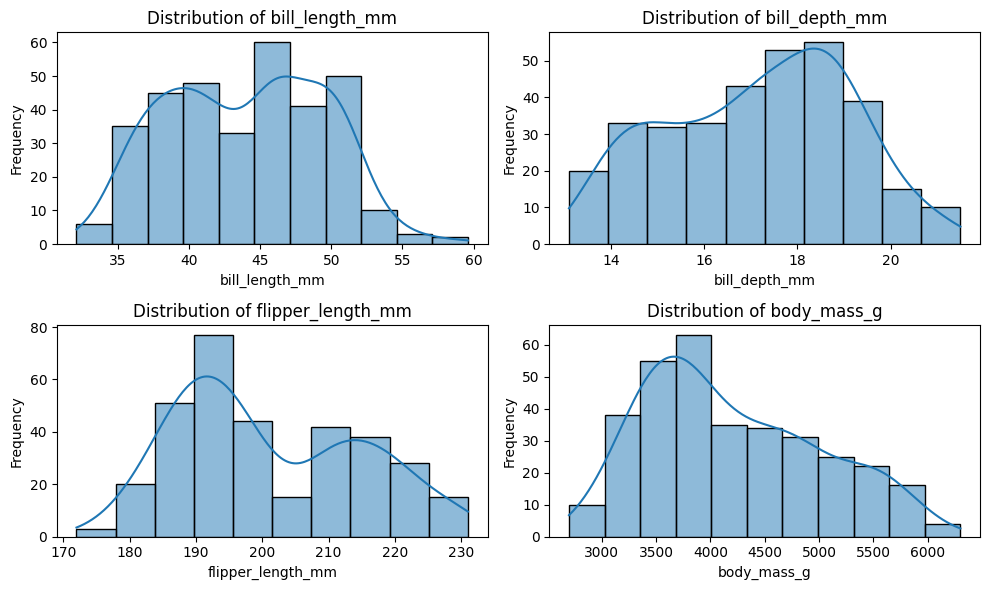

In [15]:
# for column in pen_num.columns:
#     plt.figure(figsize=(6,4))
#     sns.displot(penguins_clean[column], kde=True)
#     plt.title(f'Disbution of {column}')
#     plt.show()


# create subplots for each column
fig, axes = plt.subplots(2,2, figsize=(10, 6))
axes = axes.flatten()
for i, column in enumerate(pen_num.columns):
    sns.histplot(penguins_clean[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()


# plt.figure(figsize=(8, 6))

# plt.subplot(1,4,1)
# sns.displot(penguins_clean['bill_depth_mm'], kde=True)
# plt.title('Distribution of Bill Depth')

# plt.subplot(1,4,2)
# sns.displot(penguins_clean['bill_length_mm'], kde=True)
# plt.title('Distribution of Bill Length')

# # plt.subplot(1,4,3)
# # sns.displot(penguins_clean['flipper_length_mm'], kde=True)      
# # plt.title('Distribution of Flipper Length')

# # plt.subplot(1,4,4)
# # sns.displot(penguins_clean['body_mass_g'], kde=True)
# # plt.title('Distribution of Body Mass')

# plt.tight_layout()
# plt.show()



In [16]:
penguins_clean.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [17]:
# split data into features and target variable
X = penguins_clean.iloc[:,2:5]
y = penguins_clean['body_mass_g']

# scale the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

#split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)



In [28]:
print(X.shape)

(333, 3)


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
coef = model.coef_
intercept = model.intercept_
print(f'Coefficients: {coef}')
print(f'Intercept: {intercept}')

Coefficients: [ 21.0646914   19.77707077 703.19549413]
Intercept: 4212.706721548198


In [21]:
coeef_dataframe = pd.DataFrame(coef, index=penguins_clean.columns[2:5], columns=['Coefficient'])
print(coeef_dataframe)

                   Coefficient
bill_length_mm       21.064691
bill_depth_mm        19.777071
flipper_length_mm   703.195494


In [22]:
coef_df = pd.DataFrame({'feature': penguins_clean.columns[2:5], 'coefficient': coef})
coef_df['abs_coefficient'] = coef_df['coefficient'].abs()

coef_df.head()

,feature,coefficient,abs_coefficient
0,bill_length_mm,21.064691,21.064691
1,bill_depth_mm,19.777071,19.777071
2,flipper_length_mm,703.195494,703.195494


In [23]:
print(penguins_clean.columns[2:5])
print(penguins_clean.iloc[:,2:5].columns)

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'], dtype='object')
Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'], dtype='object')


In [24]:
# linear regression with statmodels.api
import statsmodels.api as sm

X_train = sm.add_constant(X_train)  # add constant term to the model
model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     269.3
Date:                Sat, 05 Apr 2025   Prob (F-statistic):           1.01e-79
Time:                        00:53:55   Log-Likelihood:                -1970.5
No. Observations:                 266   AIC:                             3949.
Df Residuals:                     262   BIC:                             3963.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4212.7067     24.662    170.819      0.0

In [33]:
penguins_clean.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [42]:
print(penguins_clean['flipper_length_mm'].values.reshape(-1,1))

[[181.]
 [186.]
 [195.]
 [193.]
 [190.]
 [181.]
 [195.]
 [182.]
 [191.]
 [198.]
 [185.]
 [195.]
 [197.]
 [184.]
 [194.]
 [174.]
 [180.]
 [189.]
 [185.]
 [180.]
 [187.]
 [183.]
 [187.]
 [172.]
 [180.]
 [178.]
 [178.]
 [188.]
 [184.]
 [195.]
 [196.]
 [190.]
 [180.]
 [181.]
 [184.]
 [182.]
 [195.]
 [186.]
 [196.]
 [185.]
 [190.]
 [182.]
 [190.]
 [191.]
 [186.]
 [188.]
 [190.]
 [200.]
 [187.]
 [191.]
 [186.]
 [193.]
 [181.]
 [194.]
 [185.]
 [195.]
 [185.]
 [192.]
 [184.]
 [192.]
 [195.]
 [188.]
 [190.]
 [198.]
 [190.]
 [190.]
 [196.]
 [197.]
 [190.]
 [195.]
 [191.]
 [184.]
 [187.]
 [195.]
 [189.]
 [196.]
 [187.]
 [193.]
 [191.]
 [194.]
 [190.]
 [189.]
 [189.]
 [190.]
 [202.]
 [205.]
 [185.]
 [186.]
 [187.]
 [208.]
 [190.]
 [196.]
 [178.]
 [192.]
 [192.]
 [203.]
 [183.]
 [190.]
 [193.]
 [184.]
 [199.]
 [190.]
 [181.]
 [197.]
 [198.]
 [191.]
 [193.]
 [197.]
 [191.]
 [196.]
 [188.]
 [199.]
 [189.]
 [189.]
 [187.]
 [198.]
 [176.]
 [202.]
 [186.]
 [199.]
 [191.]
 [195.]
 [191.]
 [210.]
 [190.]


In [43]:
print(penguins_clean['flipper_length_mm'].values)

[181. 186. 195. 193. 190. 181. 195. 182. 191. 198. 185. 195. 197. 184.
 194. 174. 180. 189. 185. 180. 187. 183. 187. 172. 180. 178. 178. 188.
 184. 195. 196. 190. 180. 181. 184. 182. 195. 186. 196. 185. 190. 182.
 190. 191. 186. 188. 190. 200. 187. 191. 186. 193. 181. 194. 185. 195.
 185. 192. 184. 192. 195. 188. 190. 198. 190. 190. 196. 197. 190. 195.
 191. 184. 187. 195. 189. 196. 187. 193. 191. 194. 190. 189. 189. 190.
 202. 205. 185. 186. 187. 208. 190. 196. 178. 192. 192. 203. 183. 190.
 193. 184. 199. 190. 181. 197. 198. 191. 193. 197. 191. 196. 188. 199.
 189. 189. 187. 198. 176. 202. 186. 199. 191. 195. 191. 210. 190. 197.
 193. 199. 187. 190. 191. 200. 185. 193. 193. 187. 188. 190. 192. 185.
 190. 184. 195. 193. 187. 201. 192. 196. 193. 188. 197. 198. 178. 197.
 195. 198. 193. 194. 185. 201. 190. 201. 197. 181. 190. 195. 181. 191.
 187. 193. 195. 197. 200. 200. 191. 205. 187. 201. 187. 203. 195. 199.
 195. 210. 192. 205. 210. 187. 196. 196. 196. 201. 190. 212. 187. 198.
 199. 

In [41]:
# since p-value of flipper length is < 0.05, we drop the rest of the features.
# This simplifies the model and imporves interpretability.

X1 = penguins_clean['flipper_length_mm'].values.reshape(-1,1)
y1 = penguins_clean['body_mass_g']

# print(X1.head())

# scale the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

#split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state=42)

# create a new linear regression model with only the flipper length feature
X_train = sm.add_constant(X_train)  # add constant term to the model
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     809.8
Date:                Sat, 05 Apr 2025   Prob (F-statistic):           2.09e-82
Time:                        01:14:22   Log-Likelihood:                -1971.1
No. Observations:                 266   AIC:                             3946.
Df Residuals:                     264   BIC:                             3953.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4213.0902     24.609    171.204      0.0